In [3]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from scipy.stats import uniform, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [8]:
features = np.array([])
accuracy = np.array([])
f1s = np.array([])
for num_features in range(5,146,5):
    x_train, y_train = extract_data("FinalTrainingSet.csv")
    x_val, y_val = extract_data("Validation Set.csv")
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    feat_sel = VarianceThreshold()
    x_train = feat_sel.fit_transform(x_train)
    feat_sel_2 = SelectKBest(f_classif,k=num_features)
    x_train = feat_sel_2.fit_transform(x_train,y_train)
    print("After Variance Threshold Feature Selection:",x_train.shape)
    x_val = feat_sel_2.transform(feat_sel.transform(x_val))


    rand_seed = 3454132

    oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
    x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
#     print(x_smote.shape,y_smote.shape)

    oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
    x_os, y_os = oversampler.fit_resample(x_train,y_train)
#     print(x_os.shape,y_os.shape)
    # Decision Tree
    # GaussianNB, GridSearch
    # ComplementNB, RandomizedSearch
    random_search_iterations = 1000
    k_folds = 10
    rand_seed = 3249807

    parameters = {
        'var_smoothing' : np.logspace(-10,-1,1000000)
    }
    gnb = GaussianNB()
    random_search_gaussian = RandomizedSearchCV(gnb, parameters,cv=k_folds,\
                                                  n_iter=random_search_iterations,\
                                                  random_state=rand_seed,n_jobs=-1)
    
    
    print("num_features: {}".format(num_features))
    print_res("Random Oversampling",x_os,y_os,random_search_gaussian,False)
#     disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    acc, f1 = test_res("Random Oversampling",x_val,y_val,random_search_gaussian,False)
    features = np.append(features,num_features)
    accuracy = np.append(accuracy,acc)
    f1s = np.append(f1s,f1)

After Variance Threshold Feature Selection: (401, 5)
num_features: 5
Best Score: 0.2960
Random Oversampling Train Accuracy: 30.2667%
Random Oversampling Validation Accuracy: 14.29%
Random Oversampling F1-score: 0.12
After Variance Threshold Feature Selection: (401, 10)
num_features: 10
Best Score: 0.3080
Random Oversampling Train Accuracy: 32.1333%
Random Oversampling Validation Accuracy: 19.05%
Random Oversampling F1-score: 0.13
After Variance Threshold Feature Selection: (401, 15)
num_features: 15
Best Score: 0.3000
Random Oversampling Train Accuracy: 31.3333%
Random Oversampling Validation Accuracy: 19.05%
Random Oversampling F1-score: 0.16
After Variance Threshold Feature Selection: (401, 20)
num_features: 20
Best Score: 0.2413
Random Oversampling Train Accuracy: 26.8000%
Random Oversampling Validation Accuracy: 14.29%
Random Oversampling F1-score: 0.07
After Variance Threshold Feature Selection: (401, 25)
num_features: 25
Best Score: 0.2467
Random Oversampling Train Accuracy: 26.9

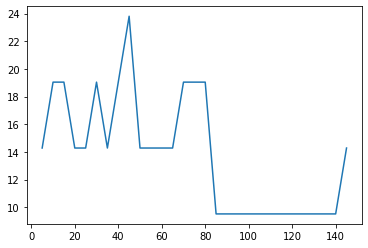

In [9]:
plt.plot(features,accuracy)
plt.show()

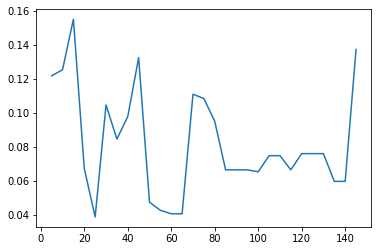

In [10]:
plt.plot(features,f1s)
plt.show()